Loading and analzying data

In [2]:
import numpy as np
import pandas as pd



Dataset found at https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

In [3]:
data = pd.read_csv("../Datasets/breast-cancer.csv")
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.style.use("ggplot")



Preprossessing

In [5]:
data.diagnosis.unique()


array(['M', 'B'], dtype=object)

M -> Malignant
B-> Beningn

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Get Missing Value

In [7]:
data.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Start Plotting Dataset to get some info

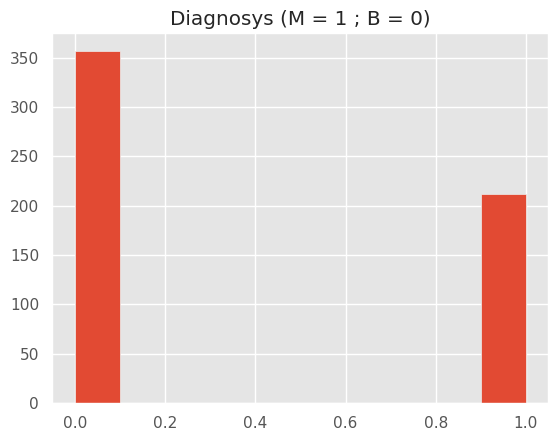

In [ ]:
data.diagnosis = data.diagnosis.apply( lambda val: 1 if val == "M" else 0)
plt.hist(data.diagnosis)
plt.title("Diagnosys (M = 1 ; B = 0)")
plt.show()


Exploratory Data Analysis

Density Graph

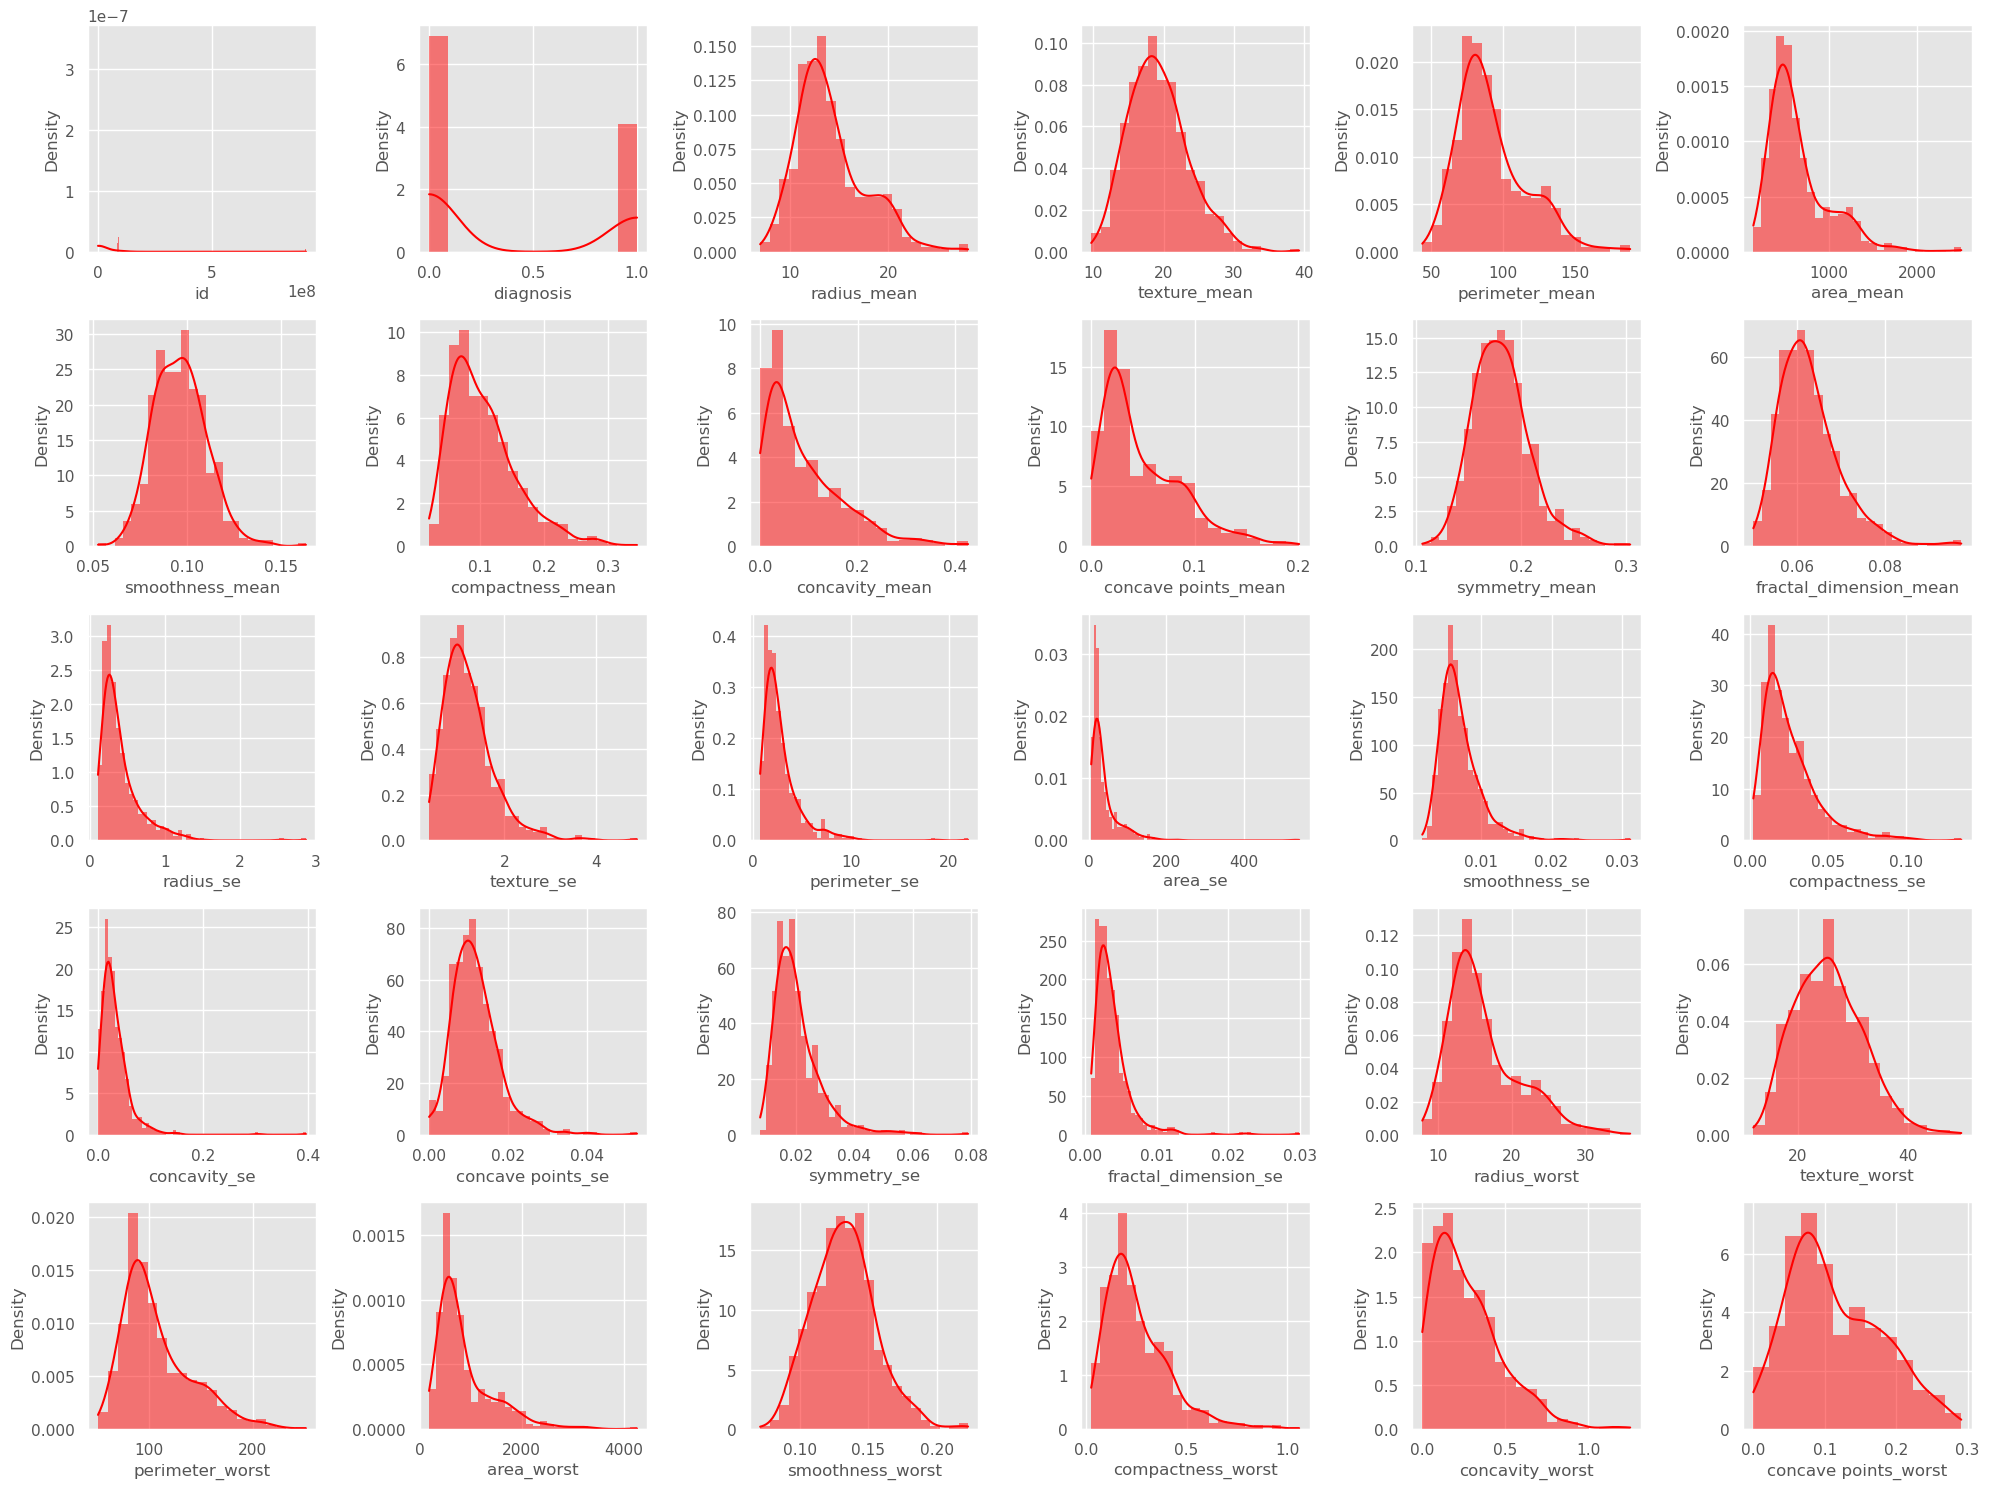

In [ ]:
plotnumber = 1
plt.figure(figsize=(20,15))

for column in data:
    if plotnumber <= 30 : # cause we got 32 columns 
        ax = plt.subplot(5,6, plotnumber) # subplots with 5 rows and 6 cols
        sns.histplot(data[column],stat="density",linewidth=0,kde=True,color="red") 
        plt.xlabel(column)
    plotnumber +=1

plt.tight_layout()
plt.show()


Correlation between Data

In [10]:
data.corr()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Heatmap since i didnt understood nothing with the table

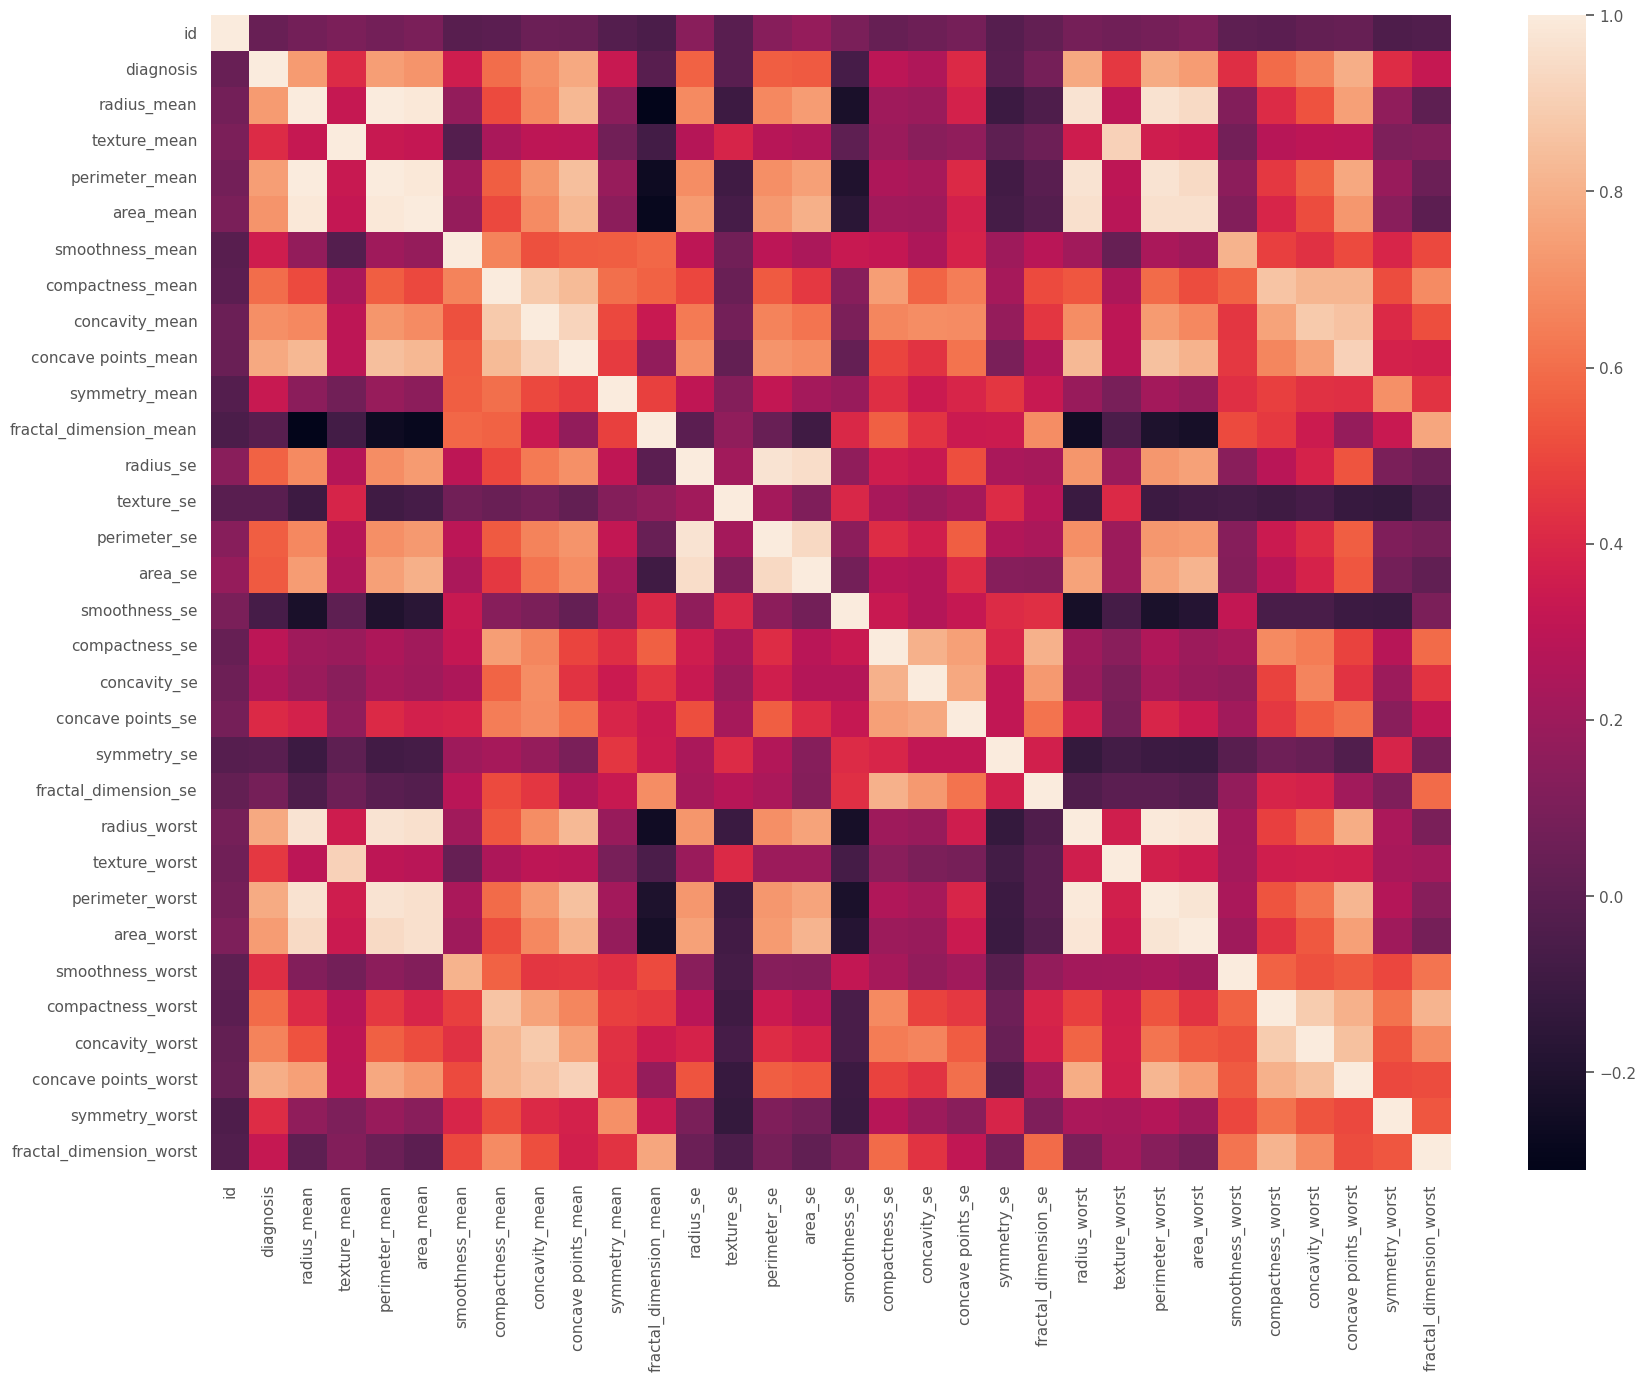

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr())
plt.show()


Removing upper triang since its duplicated

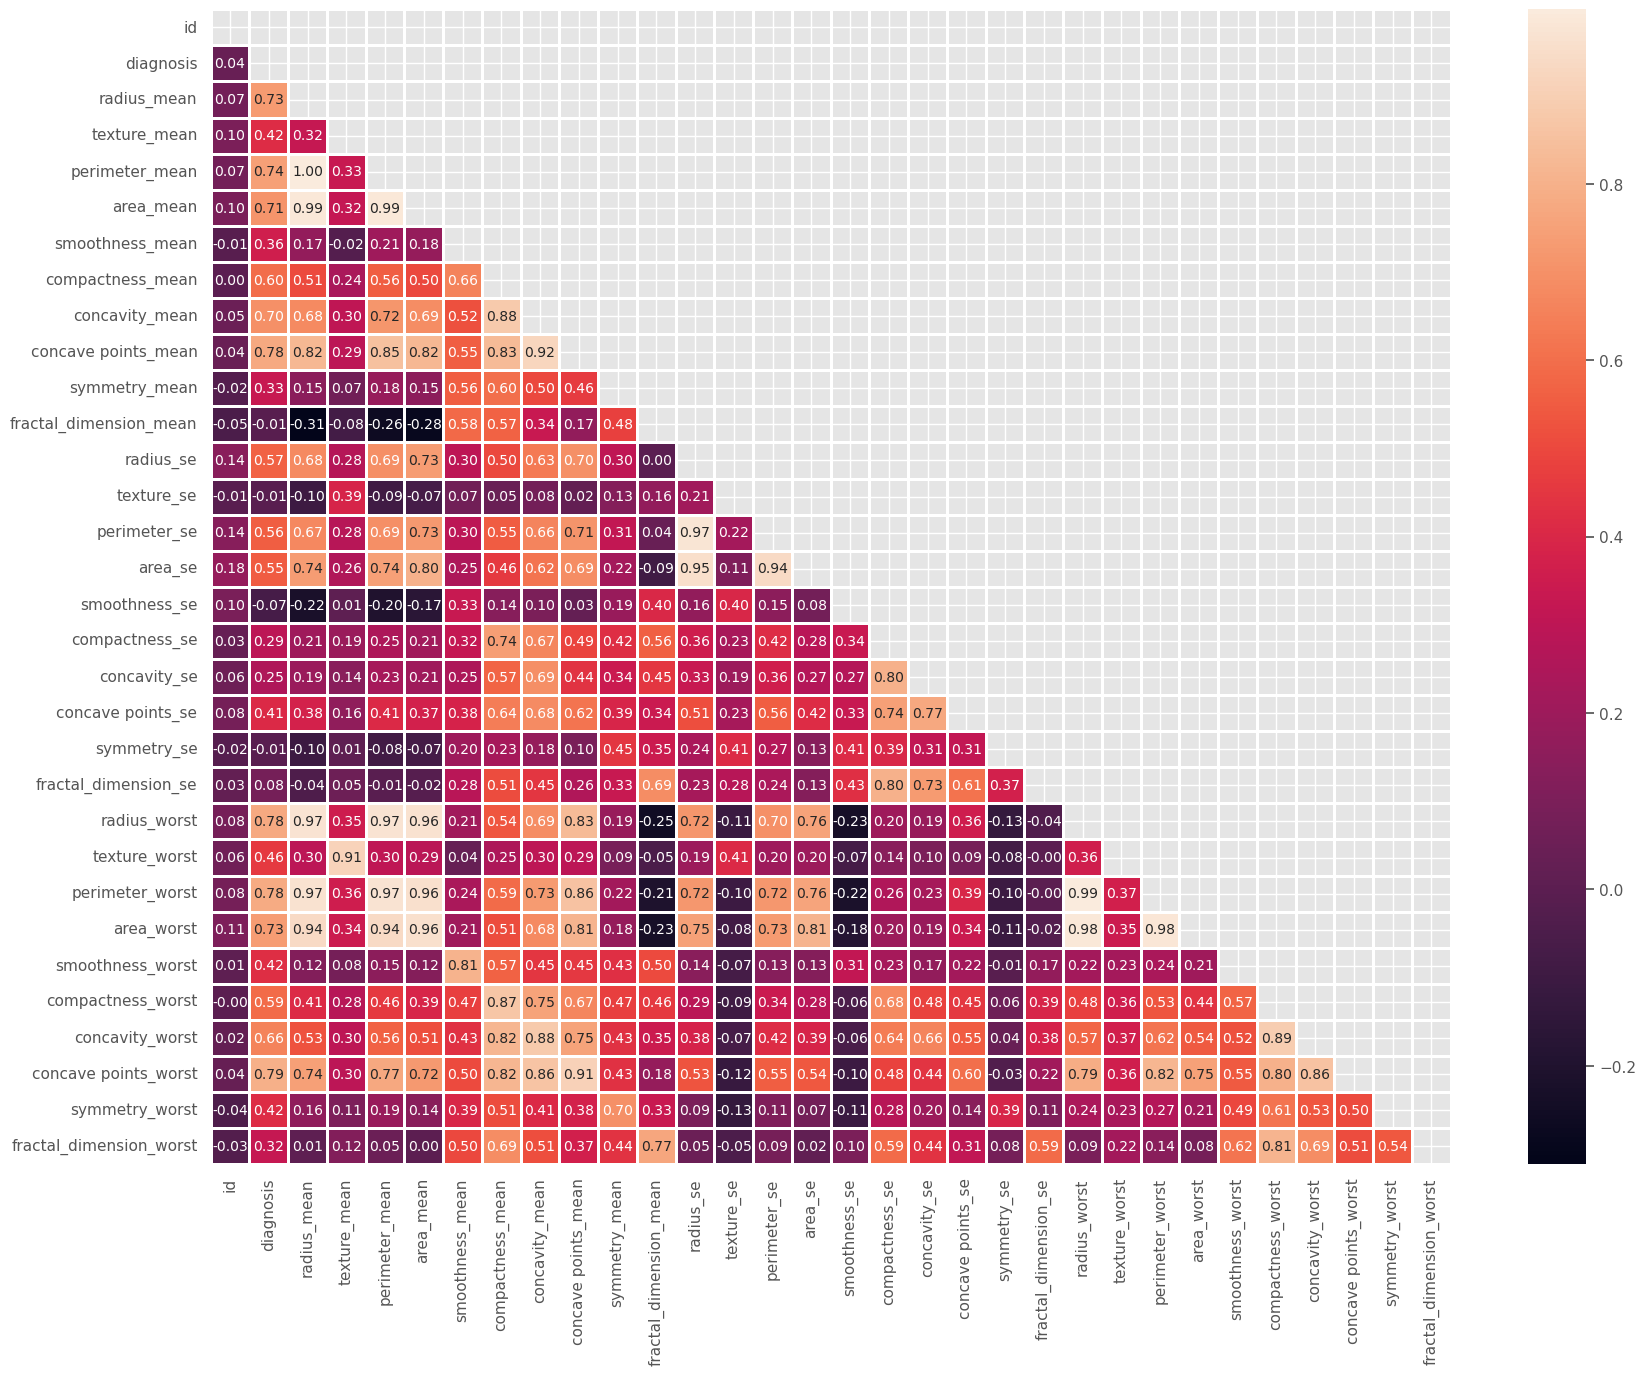

In [ ]:
corr= data.corr()
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.show()


Get the highly correlated features creating multicollinearity

In [13]:
high_corr = corr.abs()
tri_data = high_corr.mask(mask)

to_drop = [x for x in tri_data.columns if any(tri_data[x]>0.92)]

print(to_drop)
print("#cols:",data.shape[1])


['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']
#cols: 32


drop those cols and id too 

In [14]:
data = data.drop(to_drop,axis=1)
data = data.drop("id",axis=1)
print("#cols:",data.shape[1])


#cols: 23


Separate the indipendent column form the dependent one

In [15]:
X = data.drop("diagnosis",axis= 1) #indipendent Columns
y = data.diagnosis



In [16]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   concave points_mean      569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   texture_se               569 non-null    float64
 7   area_se                  569 non-null    float64
 8   smoothness_se            569 non-null    float64
 9   compactness_se           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concave points_se        569 non-null    float64
 12  symmetry_se              569 non-null    float64
 13  fractal_dimension_se     569 non-null    float64
 14  texture_worst            5

In [17]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


Start the Training 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scaling data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
display(X_train.shape)
display(X_test.shape)


(455, 22)

(114, 22)

Starting to apply the algos

In [ ]:
from sklearn.linear_model import LogisticRegression

from torch import log_ 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  #training the model


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)  #testing the model


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy on training : ",accuracy_score(y_train, log_reg.predict(X_train))) 
 
print("Accuracy on testing : ",accuracy_score(y_test, y_pred))


Accuracy on training :  0.9868131868131869
Accuracy on testing :  0.9736842105263158


In [32]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))


[[70  1]
 [ 2 41]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Same prediction but with KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)   #training the model 



KNeighborsClassifier()

In [31]:
y_pred_knn = knn.predict(X_test)  #testing the model


Same metric to show

In [33]:

print("Accuracy on training : ",accuracy_score(y_train, knn.predict(X_train))) 
 
print("Accuracy on testing : ",accuracy_score(y_test, y_pred_knn))

print(confusion_matrix(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))


Accuracy on training :  0.9714285714285714
Accuracy on testing :  0.9385964912280702
[[68  3]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



SVM Testing with hyperparams tuning

In [34]:
from altair import param
from joblib import parallel_backend
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
param_grid = {
    'gamma': [0.1, 0.01, 0.001, 1], 
    'C': [0.01,0.05,0.1,0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, param_grid, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.1, 0.1, 1, 10, 15, 20],
                         'gamma': [0.1, 0.01, 0.001, 1]},
             verbose=1)

In [36]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("best_params: ",best_params)
print("best_score: ",best_score)


best_params:  {'C': 15, 'gamma': 0.01}
best_score:  0.9714285714285715


In [37]:
svc = SVC(**best_params)
svc.fit(X_train, y_train)


SVC(C=15, gamma=0.01)

In [41]:
y_pred_svc = svc.predict(X_test)  #testing the model  with best params



Same Metrics

In [ ]:
print("Accuracy on training : ",accuracy_score(y_train, svc.predict(X_train))) 
 
print("Accuracy on testing : ",accuracy_score(y_test, y_pred_svc))

print(confusion_matrix(y_test, y_pred_svc))

print(classification_report(y_test, y_pred_svc))


Accuracy on training :  0.989010989010989
Accuracy on testing :  0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Decision Tree Classifier 

In [44]:
from calendar import c
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': range(2, 32,1),
    'min_samples_split': range(2, 10,1),
    'min_samples_leaf': range(1,10,1),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search_tree = GridSearchCV(dt, param_grid, verbose=1,cv=5,n_jobs=-1)
grid_search_tree.fit(X_train, y_train)



Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [45]:
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_
print("best_params: ",best_params_tree)
print("best_score: ",best_score_tree)


best_params:  {'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
best_score:  0.9582417582417582


In [46]:
dt = DecisionTreeClassifier(**best_params_tree)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [47]:
y_pred_dt = dt.predict(X_test)  #testing the model  with best params


In [48]:
print("Accuracy on training : ",accuracy_score(y_train, dt.predict(X_train))) 
 
print("Accuracy on testing : ",accuracy_score(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))

print(classification_report(y_test, y_pred_dt))


Accuracy on training :  0.9758241758241758
Accuracy on testing :  0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid_rf = {
    'max_depth': range(2, 32,1),
    'min_samples_split': range(2, 10,1),
    'min_samples_leaf': range(1,10,1),
    'criterion': ['gini', 'entropy'],
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, verbose=1,cv=5,n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [51]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("best_params: ",best_params_rf)
print("best_score: ",best_score_rf)


best_params:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 9}
best_score:  0.9736263736263735


In [54]:
rfc = DecisionTreeClassifier(**best_params_rf)
rfc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=9)

In [55]:
y_pred_rf = grid_search_rf.predict(X_test)  #testing the model  with best params


In [57]:
print("Accuracy on training : ",accuracy_score(y_train, rfc.predict(X_train))) 
 
print("Accuracy on testing : ",accuracy_score(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))


Accuracy on training :  0.9824175824175824
Accuracy on testing :  0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Gradient Booster Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
param_grid_gb = {
    'learning_rate' : [0.1, 0.001],
    'n_estimators' : [100,150,180],
    'loss' : ['log_loss', 'exponential']
}


In [64]:
grid_search_gb = GridSearchCV(gb, param_grid_gb, verbose=1,cv=2,n_jobs=-5)
grid_search_gb.fit(X_train, y_train)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.1, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [65]:
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print("best_params: ",best_params_gb)  
print("best_score: ",best_score_gb)


best_params:  {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}
best_score:  0.96261303037329


In [66]:
gbc = GradientBoostingClassifier(**best_params_gb)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [67]:
y_pred_gb = grid_search_gb.predict(X_test)  #testing the model  with best params


In [68]:
print("Accuracy on training : ",accuracy_score(y_train, gbc.predict(X_train)))
print("Accuracy on testing : ",accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Accuracy on training :  1.0
Accuracy on testing :  0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Final comparison 

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [round(accuracy_score(y_test, y_pred) * 100, 2), round(accuracy_score(y_test, y_pred_knn) * 100, 2), round(accuracy_score(y_test, y_pred_svc) * 100, 2),
              round(accuracy_score(y_test, y_pred_dt) * 100, 2), round(accuracy_score(y_test, y_pred_rf) * 100, 2), round(accuracy_score(y_test, y_pred_gb) * 100, 2)]
})


In [73]:
models.sort_values(by='Score', ascending=False)


,Model,Score
2,SVC,98.245614
0,Logistic Regression,97.368421
3,Decision Tree,95.614035
4,Random Forest,95.614035
5,Gradient Boosting,95.614035
1,KNN,93.859649


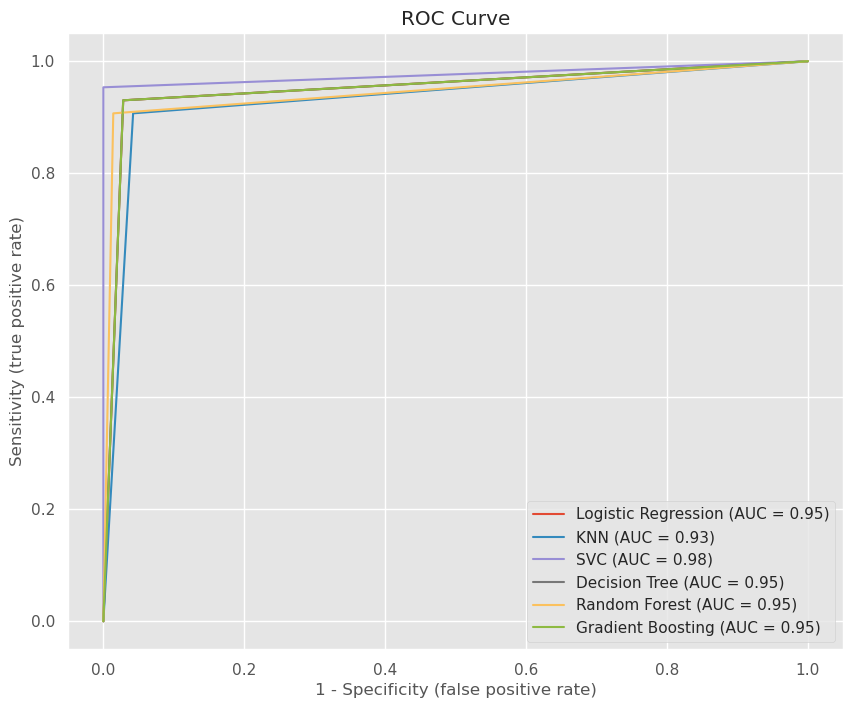

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a function to plot ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('1 - Specificity (false positive rate)')
    plt.ylabel('Sensitivity (true positive rate)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

# List of models and their predictions
models = [
    ('Logistic Regression', y_pred),
    ('KNN', y_pred_knn),
    ('SVC', y_pred_svc),
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for model_name, y_pred in models:
    plot_roc_curve(y_test, y_pred, model_name)

plt.show()


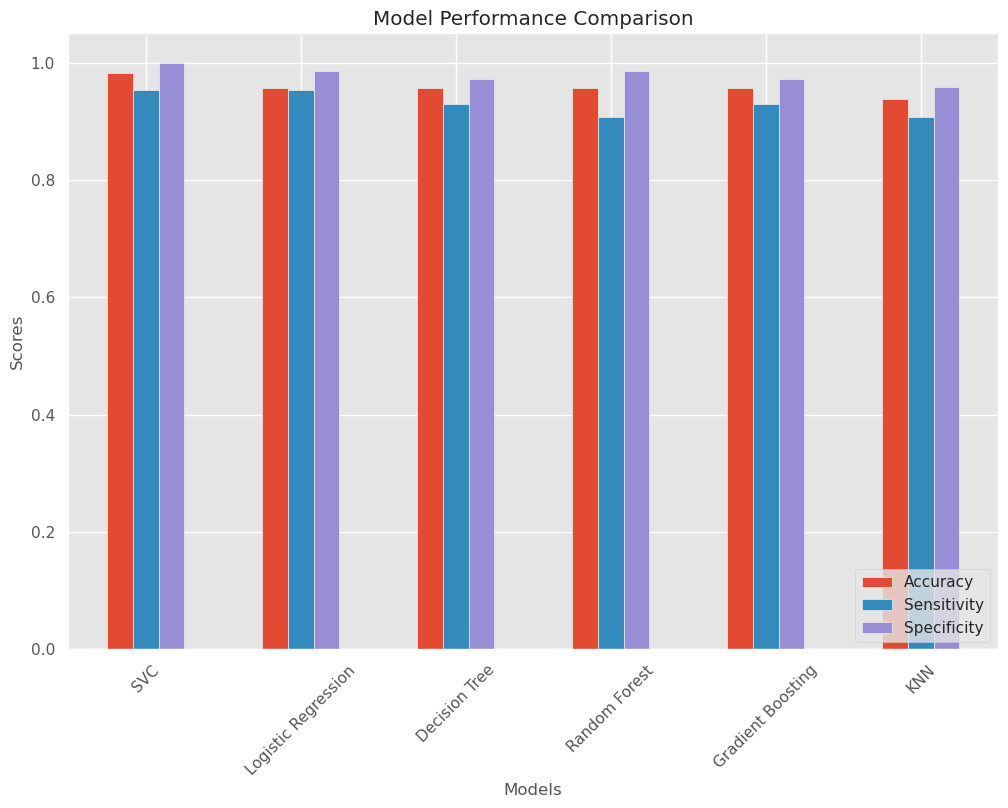

In [90]:
# Create a DataFrame to compare the performance of the models
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svc),
                 accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)],
    'Sensitivity': [sensitivity_log_reg, sensitivity_knn, sensitivity_svc, sensitivity_dt, sensitivity_rf, sensitivity_gb],
    'Specificity': [specificity_log_reg, specificity_knn, specificity_svc, specificity_dt, specificity_rf, specificity_gb]
})

# Sort the DataFrame by Accuracy in descending order
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False)

# Plot the performance comparison
performance_comparison.plot(kind='bar', x='Model', y=['Accuracy', 'Sensitivity', 'Specificity'], figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


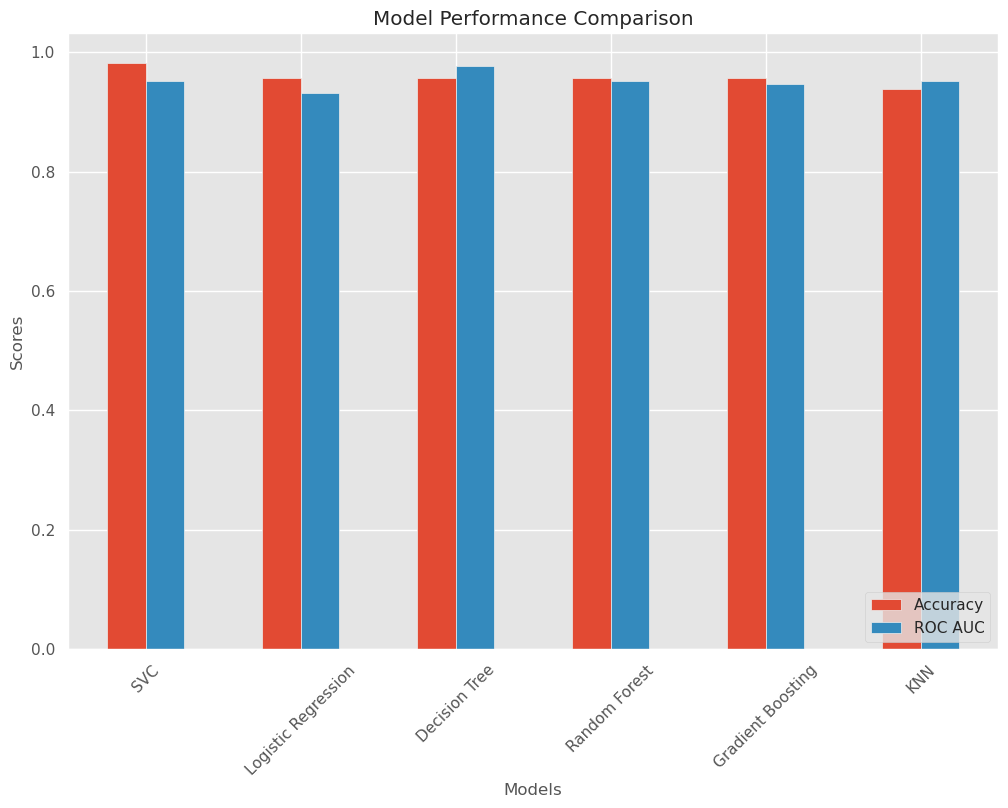

In [91]:

# Calculate ROC AUC scores for each model
roc_auc_scores = [
    roc_auc_score(y_test, y_pred),
    roc_auc_score(y_test, y_pred_knn),
    roc_auc_score(y_test, y_pred_svc),
    roc_auc_score(y_test, y_pred_dt),
    roc_auc_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_gb)
]

# Add ROC AUC scores to the DataFrame
performance_comparison['ROC AUC'] = roc_auc_scores

# Sort the DataFrame by Accuracy in descending order
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False)

# Plot the performance comparison
performance_comparison.plot(kind='bar', x='Model', y=['Accuracy', 'ROC AUC'], figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
